# Importaciones

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
%load_ext kedro.ipython

[10/17/25 01:28:11] INFO     Using                                                                  ]8;id=204463;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=33286;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro                
                             \framework\project\rich_logging.yml' as logging configuration.                        

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=327540;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=416209;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=467975;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=473279;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=213608;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=801449;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             c:\Users\droid\Desktop\Rainbow_six_kedro\proyecto-ml.                                 
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/17/25 01:28:16] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=799568;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=880506;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/17/25 01:28:17] INFO     Kedro project proteyecto-ml                                            ]8;id=925477;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=281381;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=995705;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=234445;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

[10/17/25 01:28:19] INFO     Registered line magic 'run_viz'                                        ]8;id=116033;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=416403;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\ipython\__init__.py#153\153]8;;\

# Carga de DataSet

In [ ]:
data_c1 = catalog.load("data_final")

[10/17/25 01:28:20] INFO     Loading data from data_final (CSVDataset)...                      ]8;id=320338;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=94255;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [7]:
X = data[['primaryweapon', 'mapname', 'gamemode', 'winrole',
    'roundduration', 'nbkills', 'isdead']]
y = data['haswon']


In [8]:

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
     

# Entrenamiento del modelo

In [9]:
model = LogisticRegression(class_weight='balanced',   max_iter=1000, solver='lbfgs', )
model.fit(X_train_scaled, y_train.values.ravel())

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [11]:

# Predicciones
y_pred = model.predict(X_test_scaled)
y_scores = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidad de clase positiva
     

In [17]:

predictions = model.predict(X)
print(predictions[0:100])
     

[10/17/25 01:42:32] WARNING  c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\sklear warnings.py:112
                             n\utils\validation.py:2742: UserWarning: X has feature names, but                     
                             LogisticRegression was fitted without feature names                                   
                               warnings.warn(                                                                      
                                                                                                                   

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# Resultado de las metricas

In [12]:

print(f"--- Métricas de Clasificación del modelo Logistic Regression ---\n")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Error Rate:", 1 - accuracy_score(y_test, y_pred))

# MATRIZ DE CONFUSIÓN
cm = confusion_matrix(y_test, y_pred)

--- Métricas de Clasificación del modelo Logistic Regression ---

              precision    recall  f1-score   support

           0       0.68      0.94      0.79     21369
           1       0.88      0.49      0.63     18806

    accuracy                           0.73     40175
   macro avg       0.78      0.72      0.71     40175
weighted avg       0.77      0.73      0.71     40175

Accuracy: 0.7300808960796515
Error Rate: 0.26991910392034846



Matriz de Confusión:
 [[20128  1241]
 [ 9603  9203]]


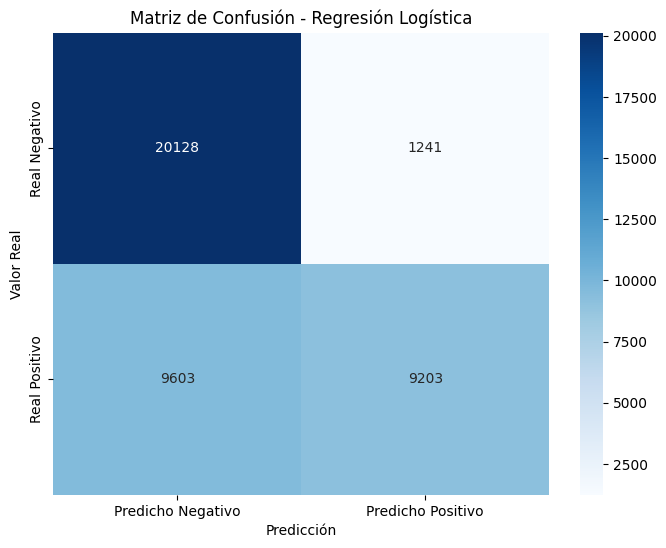

In [14]:

# prompt: crea un grafico de matris de confuccion de losgistic regresion

import matplotlib.pyplot as plt
import seaborn as sns
# MATRIZ DE CONFUSIÓN
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:\n", cm)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicho Negativo', 'Predicho Positivo'], yticklabels=['Real Negativo', 'Real Positivo'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

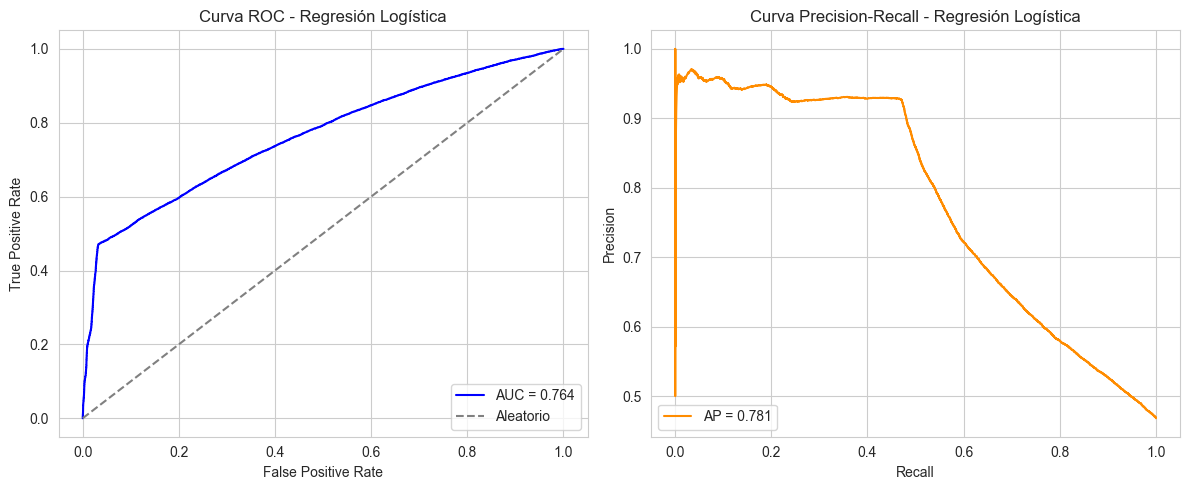

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import seaborn as sns

import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Calcular curvas y métricas
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_prec = average_precision_score(y_test, y_scores)

# Dibujar ROC y PR lado a lado
plt.figure(figsize=(12, 5))

# ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Aleatorio')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc='lower right')

# Precision-Recall
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='darkorange', label=f'AP = {avg_prec:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Regresión Logística')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# GridSearchCV

Mejores parámetros encontrados por GridSearchCV:
{'C': 0.001, 'max_iter': 1000, 'solver': 'lbfgs'}
Mejor score (accuracy) en el conjunto de validación:
0.7314341110824746

Métricas de clasificación del mejor modelo en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.68      0.95      0.79     21369
           1       0.90      0.48      0.63     18806

    accuracy                           0.73     40175
   macro avg       0.79      0.72      0.71     40175
weighted avg       0.78      0.73      0.71     40175

Accuracy en el conjunto de prueba: 0.7311512134411948

Matriz de Confusión del mejor modelo:
 [[20330  1039]
 [ 9762  9044]]


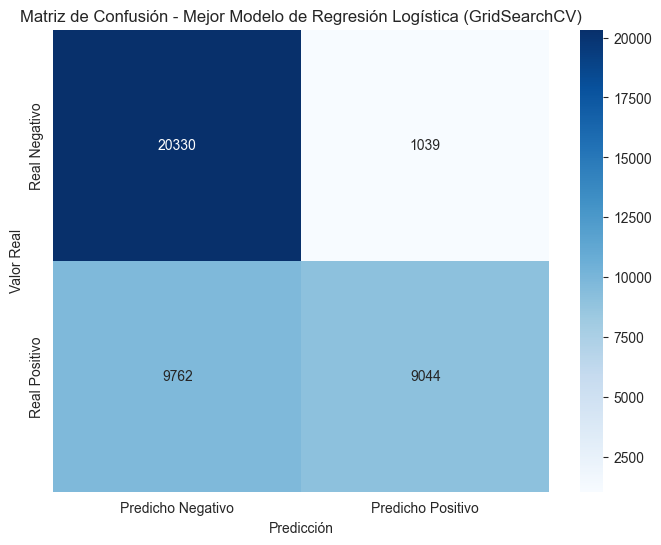


ROC AUC Score del mejor modelo: 0.763


In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularización
    'solver': ['liblinear', 'lbfgs'],  # Algoritmo de optimización
    'max_iter': [1000, 2000]  # Número máximo de iteraciones
}

# Crear el objeto LogisticRegression
logistic_regression = LogisticRegression()

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar GridSearchCV a los datos de entrenamiento escalados
grid_search.fit(X_train_scaled, y_train.values.ravel())

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados por GridSearchCV:")
print(grid_search.best_params_)

# Mostrar el mejor puntaje (accuracy) obtenido
print("Mejor score (accuracy) en el conjunto de validación:")
print(grid_search.best_score_)

# Evaluar el mejor modelo encontrado en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("\nMétricas de clasificación del mejor modelo en el conjunto de prueba:")
print(classification_report(y_test, y_pred_best))
print("Accuracy en el conjunto de prueba:", accuracy_score(y_test, y_pred_best))

# Matriz de confusión del mejor modelo
cm_best = confusion_matrix(y_test, y_pred_best)
print("\nMatriz de Confusión del mejor modelo:\n", cm_best)

# Graficar la matriz de confusión del mejor modelo
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicho Negativo', 'Predicho Positivo'], yticklabels=['Real Negativo', 'Real Positivo'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Mejor Modelo de Regresión Logística (GridSearchCV)')
plt.show()

# Curva ROC y PR del mejor modelo
y_scores_best = best_model.predict_proba(X_test_scaled)[:, 1]
roc_auc_best = roc_auc_score(y_test, y_scores_best)
print(f"\nROC AUC Score del mejor modelo: {roc_auc_best:.3f}")

fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_scores_best)


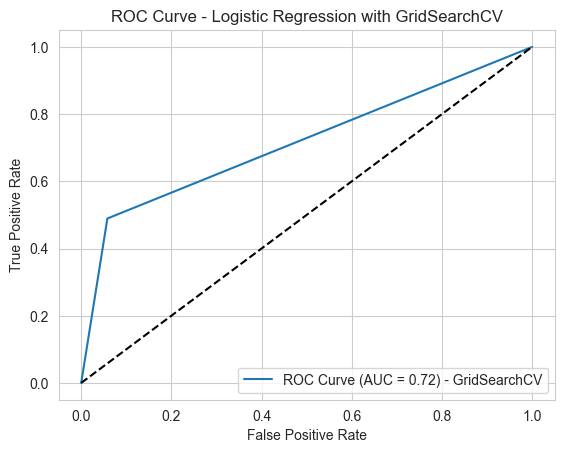

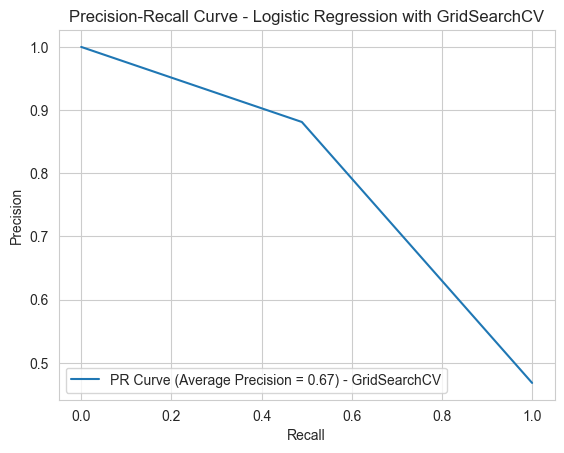

In [22]:
# Curva ROC para el mejor modelo
fpr_gs, tpr_gs, thresholds_gs_roc = roc_curve(y_test, y_pred_best)
roc_auc_gs = roc_auc_score(y_test, y_pred_best)

plt.figure()
plt.plot(fpr_gs, tpr_gs, label=f"ROC Curve (AUC = {roc_auc_gs:.2f}) - GridSearchCV")
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression with GridSearchCV")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Curva PR para el mejor modelo
precision_gs, recall_gs, thresholds_gs_pr = precision_recall_curve(y_test, y_pred_best)
average_precision_gs = average_precision_score(y_test, y_pred_best)

plt.figure()
plt.plot(recall_gs, precision_gs, label=f"PR Curve (Average Precision = {average_precision_gs:.2f}) - GridSearchCV")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression with GridSearchCV")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

## Conclusión 



## Rendimiento
El modelo de Regresión Logística entrenado para predecir si un jugador ganará una partida en Rainbow Six Siege presenta un rendimiento moderado, con un accuracy del 73% y una tasa de error del 27%. Sin embargo, un análisis más detallado revela importantes limitaciones en su capacidad predictiva.

## Hallazgos clave:
## Precisión y Recall Desbalanceados:

La clase 0 (derrota) tiene un recall alto (94%), lo que indica que el modelo identifica bien cuándo un jugador no ganará.

Por el contrario, la clase 1 (victoria) tiene un recall bajo (49%), lo que sugiere que el modelo falla en predecir correctamente muchas victorias reales.

## Matriz de Confusión:

20,128 negativos correctos y 9,203 positivos correctos.

Sin embargo, existen 9,603 falsos negativos (victorias reales incorrectamente clasificadas como derrotas) y 1,241 falsos positivos (derrotas reales incorrectamente clasificadas como victorias). Esto confirma la dificultad del modelo para predecir la clase positiva.

## Posible Desbalance de Clases:

El uso de class_weight='balanced' sugiere que el dataset podría estar desbalanceado, lo que afecta la capacidad del modelo para generalizar correctamente, especialmente para la clase minoritaria (victorias).

## Limitaciones del Modelo:

A pesar de un accuracy aceptable, el f1-score para la clase positiva (63%) es considerablemente más bajo que para la negativa (79%), lo que indica que el modelo no es confiable para predecir victorias.

La alta tasa de falsos negativos sugiere que el modelo es excesivamente conservador al predecir victorias, posiblemente debido a la naturaleza compleja y multivariable de las partidas.